In [1]:
%matplotlib inline 


In [2]:
import numpy as np
from lightkurve import search_targetpixelfile 

In [10]:
galaxy_id = 212593538

In [11]:
tpf = search_targetpixelfile(galaxy_id, campaign=6).download()

In [12]:
tpf.shape

(3561, 8, 8)

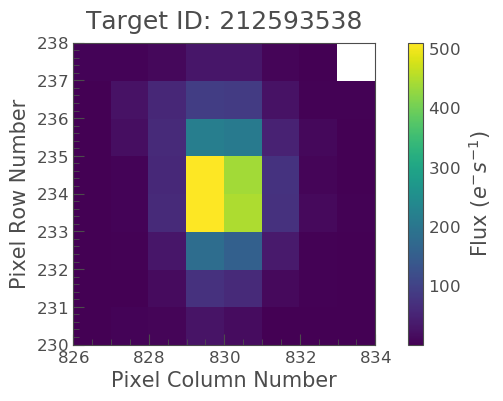

In [13]:
tpf.plot(frame=100)

In [16]:
postage_stamp_mask = tpf.hdu[2].data > 0 
postage_stamp_mask.sum()

63

In [18]:
lc_raw = tpf.to_lightcurve(aperture_mask='all')

In [25]:
_, spurious_cadences = lc_raw.flatten().remove_outliers(return_mask = True)
lc_clean = lc_raw[~spurious_cadences]

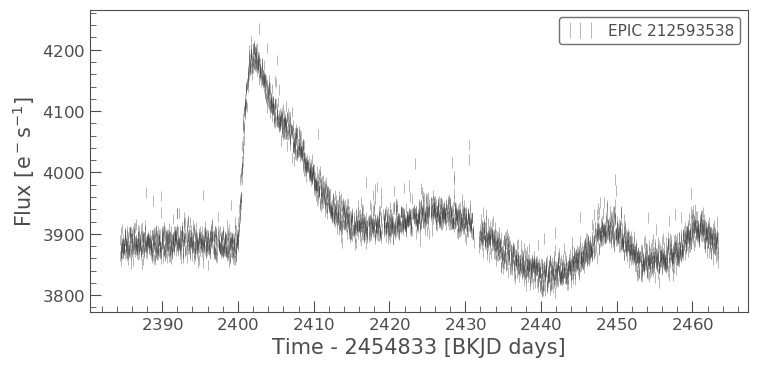

In [26]:
lc_clean.errorbar(alpha=0.5, normalize=False)

In [28]:
aperture_mask = postage_stamp_mask.copy()
print(aperture_mas)
aperture_mask[:, -1] = False 
aperture_mask[:, 0] = False 
background_mask = ~aperture_mask & postage_stamp_mask

In [29]:
print(aperture_mask)

[[False  True  True  True  True  True  True False]
 [False  True  True  True  True  True  True False]
 [False  True  True  True  True  True  True False]
 [False  True  True  True  True  True  True False]
 [False  True  True  True  True  True  True False]
 [False  True  True  True  True  True  True False]
 [False  True  True  True  True  True  True False]
 [False  True  True  True  True  True  True False]]
